### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Cargar datos
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

dataframes = [pd.read_csv(url) for url in urls]
df = pd.concat(dataframes, ignore_index=True)

# Convertir columnas a tipos adecuados
df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], format="%d/%m/%Y")
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")
df["Costo de envío"] = pd.to_numeric(df["Costo de envío"], errors="coerce")



In [ ]:
facturacion_total = df["Precio"].sum()
print(f"Facturación total: ${facturacion_total:,.2f}")



Facturación total: $4,403,619,200.00


# 2. Ventas por categoría

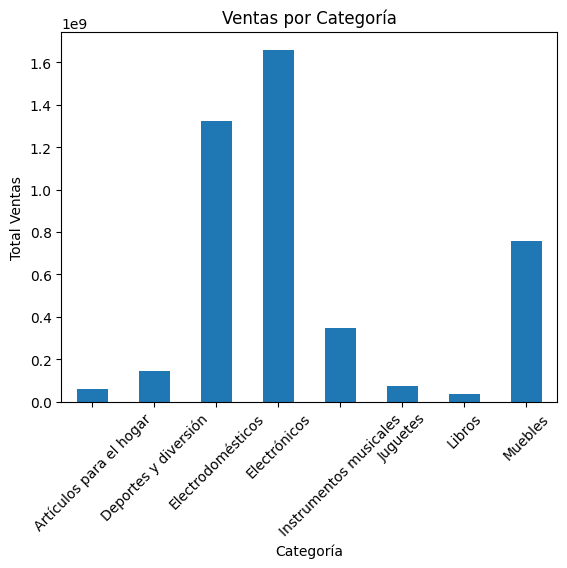

In [ ]:
ventas_categoria = df.groupby("Categoría del Producto")["Precio"].sum()
ventas_categoria.plot(kind="bar", title="Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Total Ventas")
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = df["Calificación"].mean()
print(f"Calificación promedio de la tienda: {calificacion_promedio:.2f}")

Calificación promedio de la tienda: 4.01


# 4. Productos más y menos vendidos

In [ ]:
productos_ventas = df.groupby("Producto")["Precio"].sum().sort_values(ascending=False)
print(f"Producto más vendido: {productos_ventas.idxmax()} (${productos_ventas.max():,.2f})")
print(f"Producto menos vendido: {productos_ventas.idxmin()} (${productos_ventas.min():,.2f})")


Producto más vendido: TV LED UHD 4K ($432,489,600.00)
Producto menos vendido: Cubo mágico 8x8 ($2,729,300.00)


# 5. Envío promedio por tienda

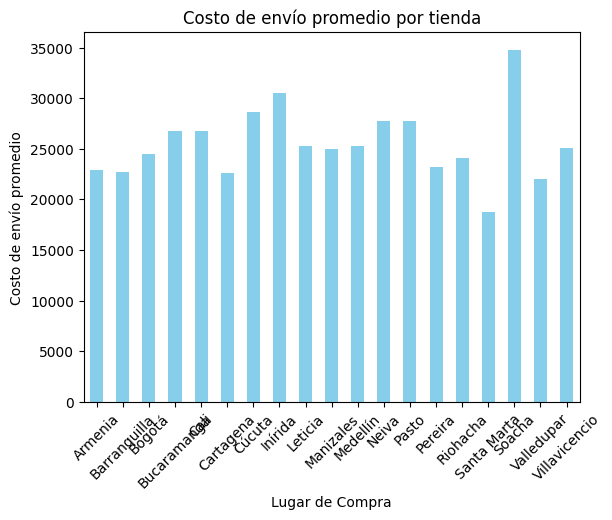

In [ ]:
envio_promedio = df.groupby("Lugar de Compra")["Costo de envío"].mean()
envio_promedio.plot(kind="bar", title="Costo de envío promedio por tienda", color="skyblue")
plt.xlabel("Lugar de Compra")
plt.ylabel("Costo de envío promedio")
plt.xticks(rotation=45)
plt.show()